<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/classification_MLP_using_the_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to build, train, evaluate and use a classification MLP using the
Sequential API**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.__version__
'2.0.0'

keras.__version__
'2.2.4-tf'

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
c=np.array([[1,2,3,4],[5,6,7,8],[1,2,3,4],[5,6,7,8]])

In [13]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[28, 28]),
            keras.layers.Dense(300, activation="relu"),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(10, activation="softmax")
          ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[0].name

'flatten'

In [17]:
# kk=model.get_layer('dense_5')

In [18]:
# weights, biases = kk.get_weights()

In [19]:
# weights.shape,biases.shape

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2206 - accuracy: 0.9209 - val_loss: 0.3325 - val_accuracy: 0.8822
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2178 - accuracy: 0.9213 - val_loss: 0.3095 - val_accuracy: 0.8866
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2153 - accuracy: 0.9217 - val_loss: 0.2957 - val_accuracy: 0.8934
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2109 - accuracy: 0.9243 - val_loss: 0.3184 - val_accuracy: 0.8860
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2079 - accuracy: 0.9258 - val_loss: 0.3115 - val_accuracy: 0.8906
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2046 - accuracy: 0.9269 - val_loss: 0.3075 - val_accuracy: 0.8908
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2008 - accuracy: 0.9275 - val_loss: 0.2917 - val_accurac

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
#history.history

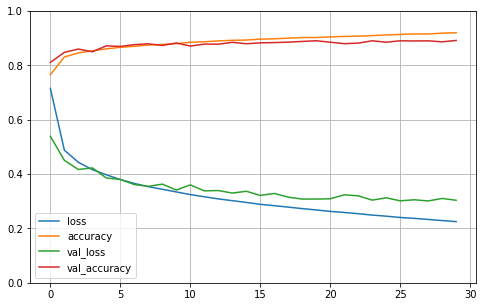

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 54.8412 - accuracy: 0.8590


[54.84116744995117, 0.859000027179718]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 81ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 20ms/step


In [28]:
classes_x=np.argmax(y_pred,axis=1)

In [29]:
classes_x

array([9, 2, 1])

In [30]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')